In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [33]:
w=16

In [34]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [35]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475321, 16, 16)
strides:  (2048, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1ea0ac6a040
byteorder:  little
byteswap:  False
type: float64


In [36]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [37]:
np.info(labels)

class:  ndarray
shape:  (475321,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1e6e6c0b040
byteorder:  little
byteswap:  False
type: float64


In [38]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [39]:
training_sample_labels

380256

In [40]:
training_sample

380256

In [41]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [42]:
train_X.shape

(380256, 16, 15)

In [43]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
#print(train_X)

In [45]:
train_y.shape

(380256,)

In [46]:
#print(test_y)

In [47]:
train_y=train_y.reshape(train_y.shape[0],1)

In [48]:
test_y=test_y.reshape(test_y.shape[0],1)

In [49]:
#print(train_X)

In [50]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380256, 16, 15) (380256, 1) (95065, 16, 15) (95065, 1)


In [51]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(256,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=128,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=64),#,activation='relu'),
    keras.layers.Dense(units=100,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])

#opt=keras.optimizers.SGD(learning_rate=0.9)
opt=keras.optimizers.Adam(learning_rate=0.0005)
model_gru.compile(loss='MSE', optimizer=opt,metrics=['accuracy'])

In [52]:
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 16, 256)           209664    
                                                                 
 gru_4 (GRU)                 (None, 16, 128)           148224    
                                                                 
 gru_5 (GRU)                 (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 100)               6500      
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401,737
Trainable params: 401,737
Non-trainable params: 0
_________________________________________________________________


In [53]:
 start = t.time()

In [54]:
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y),batch_size=16384)#, shuffle=False)

Epoch 1/140
24/24 [==============================] - 10s 203ms/step - loss: 0.1969 - accuracy: 0.7393 - val_loss: 0.1837 - val_accuracy: 0.7531
Epoch 2/140
24/24 [==============================] - 4s 153ms/step - loss: 0.1849 - accuracy: 0.7383 - val_loss: 0.1718 - val_accuracy: 0.7458
Epoch 3/140
24/24 [==============================] - 4s 153ms/step - loss: 0.1727 - accuracy: 0.7388 - val_loss: 0.1641 - val_accuracy: 0.7519
Epoch 4/140
24/24 [==============================] - 4s 153ms/step - loss: 0.1694 - accuracy: 0.7388 - val_loss: 0.1637 - val_accuracy: 0.7526
Epoch 5/140
24/24 [==============================] - 4s 154ms/step - loss: 0.1686 - accuracy: 0.7399 - val_loss: 0.1623 - val_accuracy: 0.7532
Epoch 6/140
24/24 [==============================] - 4s 155ms/step - loss: 0.1674 - accuracy: 0.7425 - val_loss: 0.1612 - val_accuracy: 0.7540
Epoch 7/140
24/24 [==============================] - 4s 155ms/step - loss: 0.1648 - accuracy: 0.7478 - val_loss: 0.1601 - val_accuracy: 0.753

Epoch 58/140
24/24 [==============================] - 4s 154ms/step - loss: 0.1458 - accuracy: 0.7780 - val_loss: 0.1459 - val_accuracy: 0.7786
Epoch 59/140
24/24 [==============================] - 4s 155ms/step - loss: 0.1451 - accuracy: 0.7789 - val_loss: 0.1445 - val_accuracy: 0.7789
Epoch 60/140
24/24 [==============================] - 4s 155ms/step - loss: 0.1450 - accuracy: 0.7789 - val_loss: 0.1455 - val_accuracy: 0.7777
Epoch 61/140
24/24 [==============================] - 4s 155ms/step - loss: 0.1451 - accuracy: 0.7789 - val_loss: 0.1451 - val_accuracy: 0.7780
Epoch 62/140
24/24 [==============================] - 4s 155ms/step - loss: 0.1451 - accuracy: 0.7791 - val_loss: 0.1445 - val_accuracy: 0.7807
Epoch 63/140
24/24 [==============================] - 4s 155ms/step - loss: 0.1447 - accuracy: 0.7793 - val_loss: 0.1448 - val_accuracy: 0.7788
Epoch 64/140
24/24 [==============================] - 4s 155ms/step - loss: 0.1446 - accuracy: 0.7800 - val_loss: 0.1449 - val_accuracy:

Epoch 115/140
24/24 [==============================] - 4s 154ms/step - loss: 0.1408 - accuracy: 0.7856 - val_loss: 0.1424 - val_accuracy: 0.7852
Epoch 116/140
24/24 [==============================] - 4s 154ms/step - loss: 0.1407 - accuracy: 0.7859 - val_loss: 0.1441 - val_accuracy: 0.7828
Epoch 117/140
24/24 [==============================] - 4s 155ms/step - loss: 0.1407 - accuracy: 0.7858 - val_loss: 0.1423 - val_accuracy: 0.7851
Epoch 118/140
24/24 [==============================] - 4s 154ms/step - loss: 0.1409 - accuracy: 0.7857 - val_loss: 0.1432 - val_accuracy: 0.7832
Epoch 119/140
24/24 [==============================] - 4s 154ms/step - loss: 0.1413 - accuracy: 0.7852 - val_loss: 0.1458 - val_accuracy: 0.7845
Epoch 120/140
24/24 [==============================] - 4s 154ms/step - loss: 0.1411 - accuracy: 0.7861 - val_loss: 0.1422 - val_accuracy: 0.7841
Epoch 121/140
24/24 [==============================] - 4s 154ms/step - loss: 0.1408 - accuracy: 0.7858 - val_loss: 0.1421 - val_ac

In [55]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 18s 6ms/step


In [56]:
stop=t.time()-start
print(stop)

545.6832015514374


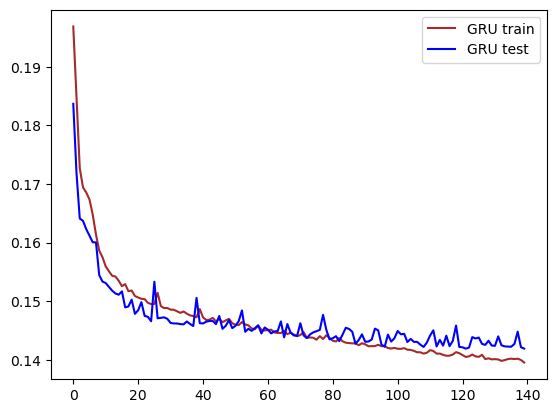

In [57]:
#plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
#plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

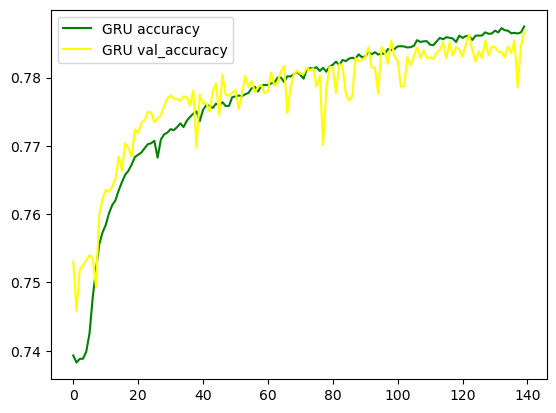

In [58]:
plt.plot(gru_history.history['accuracy'], label='GRU accuracy', color='green')
plt.plot(gru_history.history['val_accuracy'], label='GRU val_accuracy', color='yellow')
plt.legend()
plt.show()

In [59]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [60]:
np.shape(pred_y)

(95065, 1)

In [61]:
pred_y

array([[0.00740907],
       [0.00589463],
       [0.00301021],
       ...,
       [0.05396727],
       [0.05518254],
       [0.05584165]], dtype=float32)

In [62]:
pred_y=np.reshape(pred_y,95065)

0.14190212455999937
0.23693803596985674
0.37669898401774243
0.2745763121444791


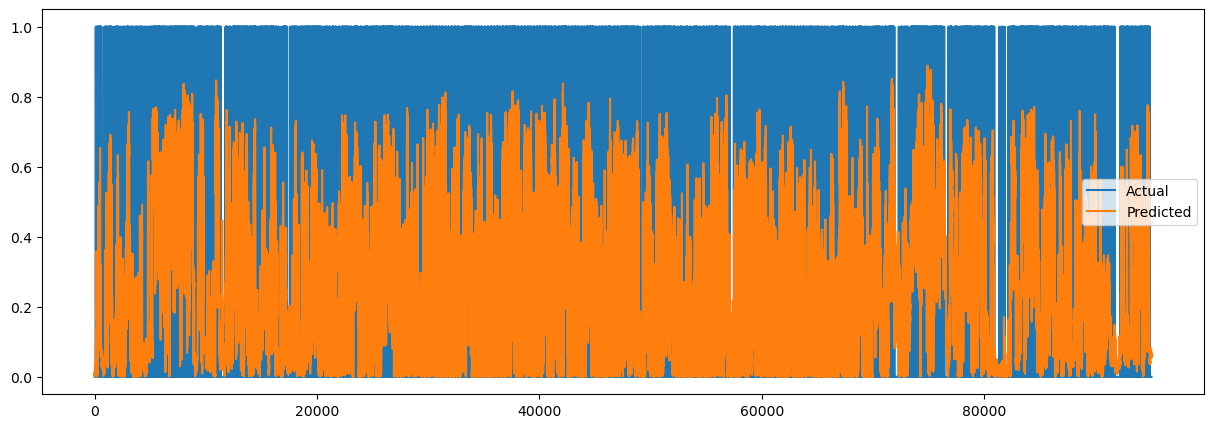

In [63]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [64]:
np.shape(train_X)

(380256, 16, 15)

In [65]:
np.shape(train_y)

(380256, 1)

In [66]:
np.shape(test_X)

(95065, 16, 15)

In [67]:
np.shape(test_y)

(95065, 1)

14854/14854 [==============================] - 84s 6ms/step


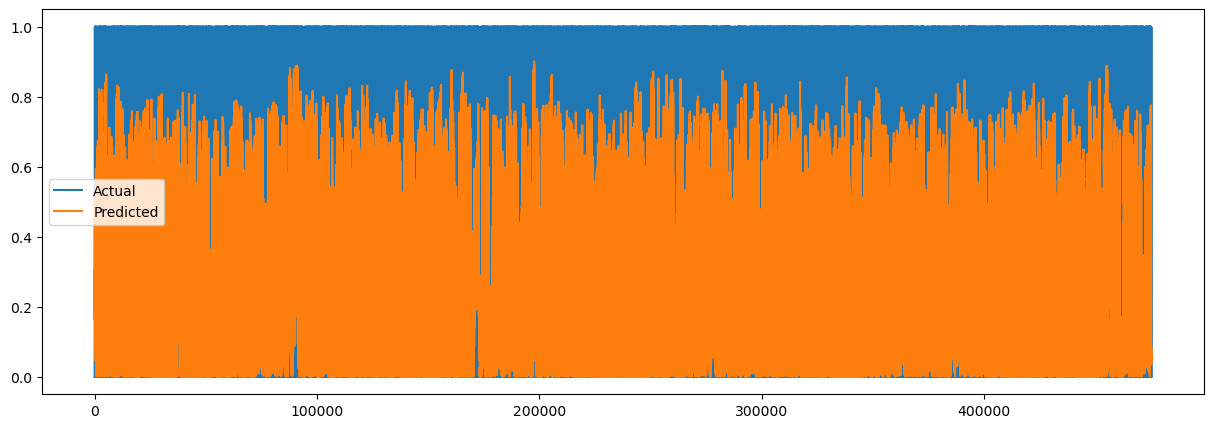

In [68]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

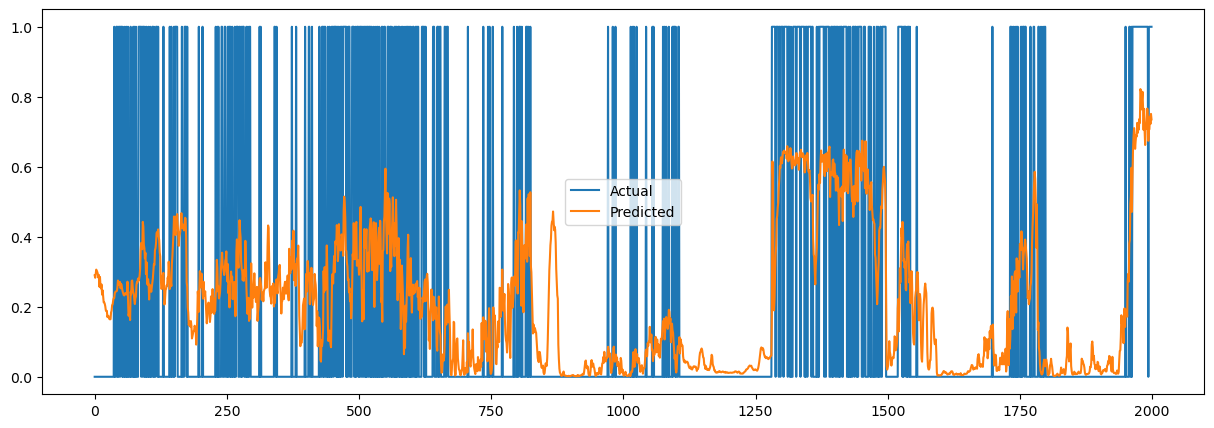

In [69]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [70]:
print(sum(tes)/len(tes))

[0.25794568]


In [71]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.63157374]
[0.81869974]
total acc [0.7868472]


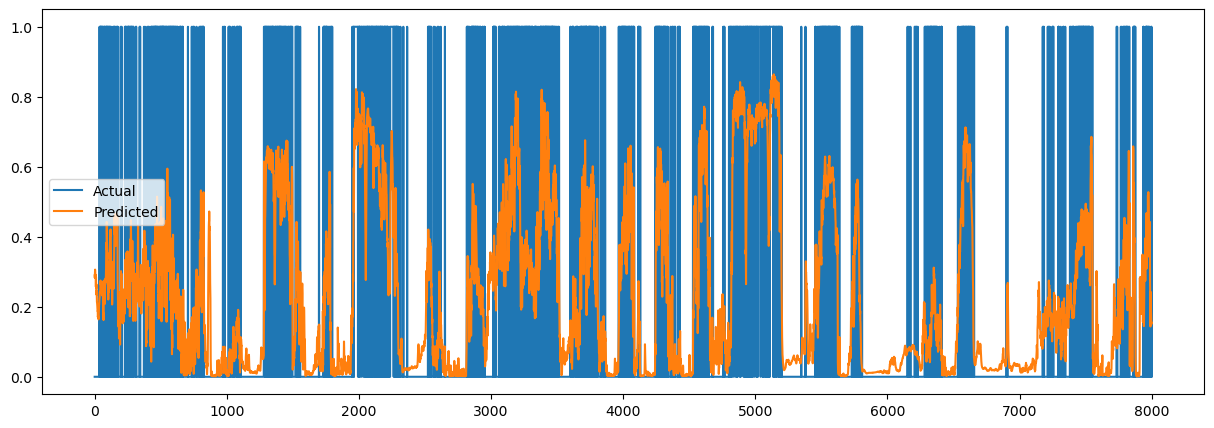

In [72]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

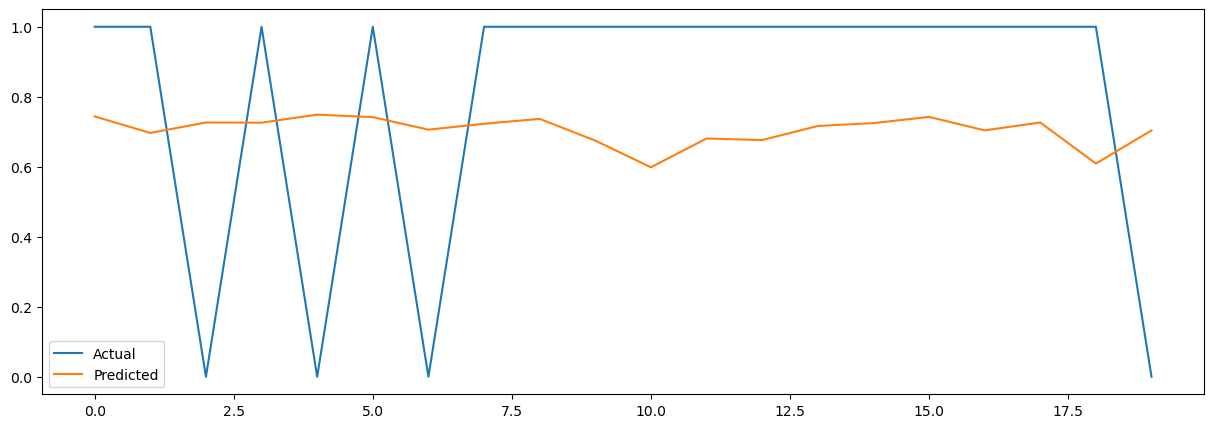

In [73]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

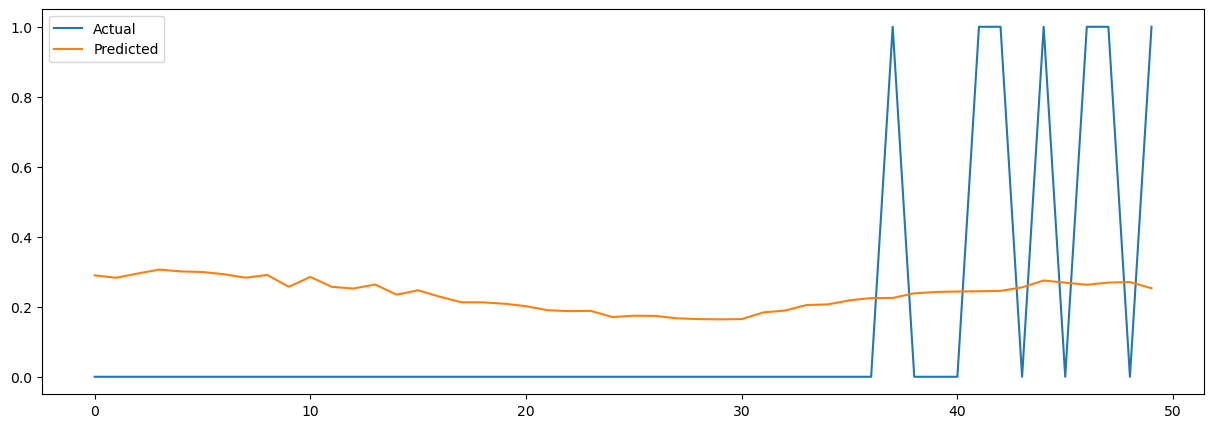

In [74]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

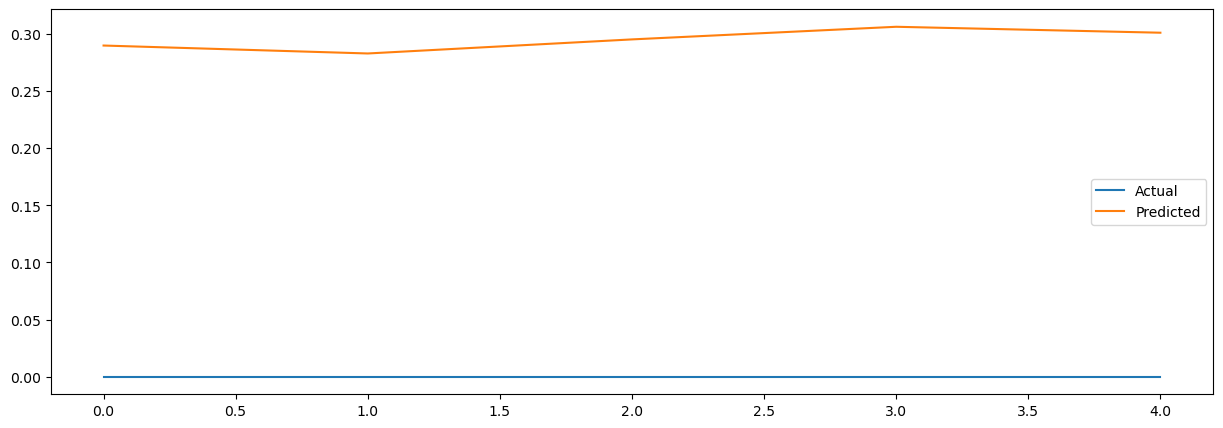

In [75]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

In [76]:
tf.config.experimental.get_memory_info('GPU:0')

{'current': 461736704, 'peak': 5023206656}